## Import libraries

In [1]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [4]:
test_results_csv = 'test_results.csv'
test_results_path = os.path.join(proj_path, test_results_csv)
test_results_df = pd.read_csv(test_results_path)

In [5]:
test_results_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
test_results_df.head()

,img_path,label,predicted_probs,predicted_label
0,/content/drive/MyDrive/Magnimind/Face_detectio...,Autistic,0.937570,1
1,/content/drive/MyDrive/Magnimind/Face_detectio...,Autistic,0.790582,1
2,/content/drive/MyDrive/Magnimind/Face_detectio...,Autistic,0.844823,1
3,/content/drive/MyDrive/Magnimind/Face_detectio...,Autistic,0.706256,1
4,/content/drive/MyDrive/Magnimind/Face_detectio...,Autistic,0.790958,1


In [7]:
test_results_df['label'] = test_results_df['label'].map({'Autistic': 1, 'Non_Autistic': 0})

In [8]:
def determine_prediction_type(row):
    actual = row['label']
    predicted = row['predicted_label']
    if actual == 1 and predicted == 1:
        return 'TP'  # True Positive
    elif actual == 0 and predicted == 0:
        return 'TN'  # True Negative
    elif actual == 0 and predicted == 1:
        return 'FP'  # False Positive
    elif actual == 1 and predicted == 0:
        return 'FN'  # False Negative
    else:
        return 'Undefined'  # In case there are any other values

# Apply the function to each row of the dataframe
test_results_df['prediction_type'] = test_results_df.apply(determine_prediction_type, axis=1)

In [9]:
test_results_df.head()

,img_path,label,predicted_probs,predicted_label,prediction_type
0,/content/drive/MyDrive/Magnimind/Face_detectio...,1,0.937570,1,TP
1,/content/drive/MyDrive/Magnimind/Face_detectio...,1,0.790582,1,TP
2,/content/drive/MyDrive/Magnimind/Face_detectio...,1,0.844823,1,TP
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,0.706256,1,TP
4,/content/drive/MyDrive/Magnimind/Face_detectio...,1,0.790958,1,TP


In [10]:
FP_list = test_results_df[test_results_df['prediction_type'] == 'FP']['img_path'].to_list()
FP_list

['/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.106.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.116.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.111.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.102.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.12.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.129.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.133.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.19.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.2.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.36.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.46.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.48.jpg',

In [24]:
TN_list = test_results_df[test_results_df['prediction_type'] == 'TN']['img_path'].to_list()
TN_list

['/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.104.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.119.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.107.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.121.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.113.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.124.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.117.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.115.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.10.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.103.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.109.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Non_Autistic.122

In [11]:
TP_list = test_results_df[test_results_df['prediction_type'] == 'TP']['img_path'].to_list()
TP_list

['/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.100.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.108.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.106.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.1.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.103.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.107.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.110.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.113.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.111.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.0.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.10.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.114.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detec

In [12]:
FN_list = test_results_df[test_results_df['prediction_type'] == 'FN']['img_path'].to_list()
FN_list

['/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.11.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.115.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.104.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.12.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.126.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.14.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.148.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.135.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.146.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.136.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.18.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detection/MP/../test/Autistic.3.jpg',
 '/content/drive/MyDrive/Magnimind/Face_detect

In [13]:
pretrained_model_name = 'vggmodel_best.hdf5'
pretrained_model_path = os.path.join(proj_path, pretrained_model_name)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
from PIL import Image
from skimage import io, filters
from scipy import ndimage
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [15]:
# Input shape required by VGG16
IMAGE_WIDTH=512
IMAGE_HEIGHT=512
IMAGE_CHANNELS=3
INP_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
IMAGE_SIZE=(IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 64

In [16]:

# Load the VGG16 model without the top classification layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=INP_SHAPE)

# Freeze the layers of VGG16 model to not train them during the fine-tuning
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new top model to put on top of the VGG16
x = vgg_model.output
x = GlobalAveragePooling2D()(x)  # Flatten the output of the conv layers

# Add new layers
x = Dense(128, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

x = Dense(64, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

# Add a final output layer for binary classification with a sigmoid activation
predictions = Dense(1, activation='sigmoid')(x)

# This is the new model we will train
model = Model(inputs=vgg_model.input, outputs=predictions)


58889256/58889256 [==============================] - 0s 0us/step


In [17]:
if os.path.exists(pretrained_model_path):
    model.load_weights(pretrained_model_path)

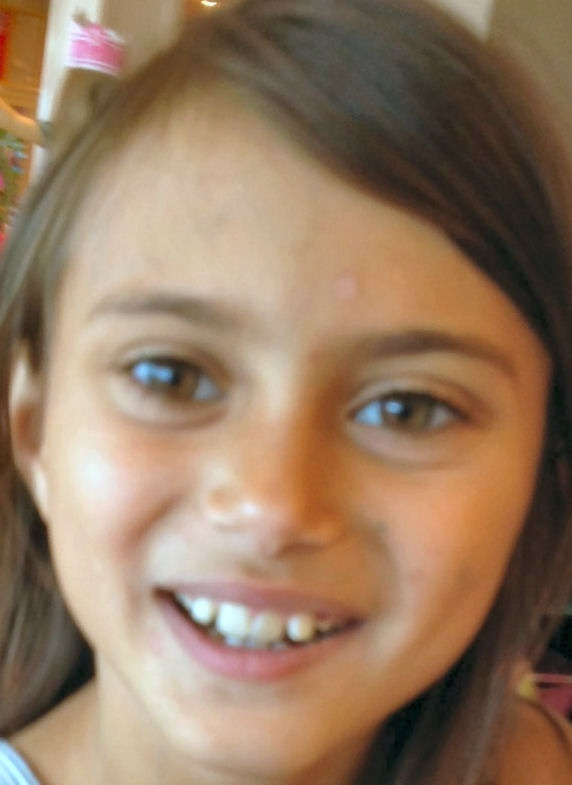

In [18]:
from google.colab.patches import cv2_imshow
img = cv2.imread(TP_list[3])
cv2_imshow(img)

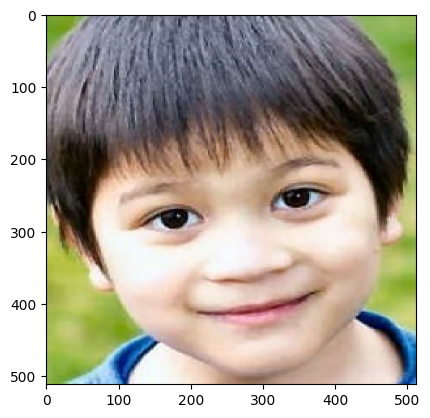

1/1 [==============================] - 2s 2s/step


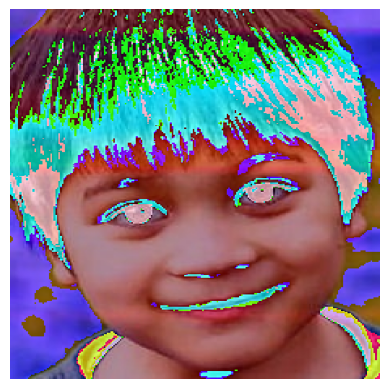

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

# Assuming preprocess_input is properly defined or imported for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming FN_list[0] is the path to your image
image = load_img(FN_list[20], target_size=(512, 512))  # Adjusting to VGG16's expected input
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension
plt.imshow(img_array[0].astype('uint8'))
plt.show()
img_array_1 = preprocess_input(img_array)

# Predict the class
preds = model.predict(img_array_1)
predicted_class = (preds > 0.5).astype("int32")

# Get the weights of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv3')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
class GradModel(tf.keras.models.Model):
    def __init__(self, model, last_conv_layer):
        super().__init__()
        self.model = model
        self.last_conv_layer = last_conv_layer
        self.gradient_model = tf.keras.models.Model(
            [model.inputs], [last_conv_layer.output, model.output])

    def call(self, inputs, training=None):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.gradient_model(inputs)
            tape.watch(conv_outputs)
            # Use predictions[:, 0] for binary classifiers with single sigmoid output
            top_pred_index = tf.argmax(predictions, axis=1)[0]
            top_class_channel = predictions[:, top_pred_index]

        # Compute gradients with respect to the conv_outputs
        grads = tape.gradient(top_class_channel, conv_outputs)

        return conv_outputs, grads

# Create a GradModel instance
grad_model = GradModel(model, last_conv_layer)

# Get the activations of the last conv layer and the gradients
conv_outputs, grads = grad_model(img_array_1)

# Average the gradients over the width and height
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
conv_outputs = conv_outputs[0].numpy()  # Convert to numpy array for item assignment
for i in range(conv_outputs.shape[-1]):
    conv_outputs[:, :, i] *= pooled_grads[i].numpy()

# The channel-wise mean of the resulting feature map is our heatmap of class activation
heatmap = np.mean(conv_outputs, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize the heatmap to the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[0], img_array.shape[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Display the superimposed image
plt.imshow(superimposed_img.astype('uint8'))
plt.axis('off')
plt.show()

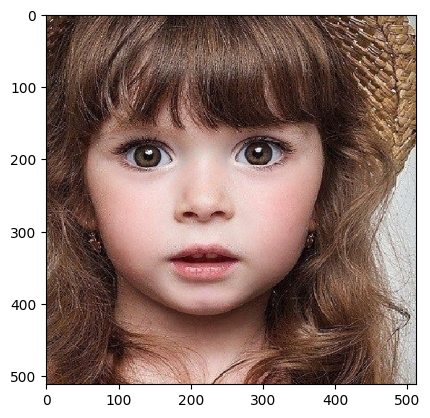

1/1 [==============================] - 2s 2s/step


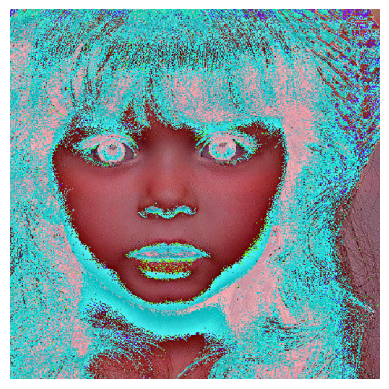

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

# Assuming preprocess_input is properly defined or imported for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming FP_list[0] is the path to your image
image = load_img(FP_list[20], target_size=(512, 512))  # Adjusting to VGG16's expected input
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension
plt.imshow(img_array[0].astype('uint8'))
plt.show()
img_array_1 = preprocess_input(img_array)

# Predict the class
preds = model.predict(img_array_1)
predicted_class = (preds > 0.5).astype("int32")

# Get the weights of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv3')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
class GradModel(tf.keras.models.Model):
    def __init__(self, model, last_conv_layer):
        super().__init__()
        self.model = model
        self.last_conv_layer = last_conv_layer
        self.gradient_model = tf.keras.models.Model(
            [model.inputs], [last_conv_layer.output, model.output])

    def call(self, inputs, training=None):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.gradient_model(inputs)
            tape.watch(conv_outputs)
            # Use predictions[:, 0] for binary classifiers with single sigmoid output
            top_pred_index = tf.argmax(predictions, axis=1)[0]
            top_class_channel = predictions[:, top_pred_index]

        # Compute gradients with respect to the conv_outputs
        grads = tape.gradient(top_class_channel, conv_outputs)

        return conv_outputs, grads

# Create a GradModel instance
grad_model = GradModel(model, last_conv_layer)

# Get the activations of the last conv layer and the gradients
conv_outputs, grads = grad_model(img_array_1)

# Average the gradients over the width and height
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
conv_outputs = conv_outputs[0].numpy()  # Convert to numpy array for item assignment
for i in range(conv_outputs.shape[-1]):
    conv_outputs[:, :, i] *= pooled_grads[i].numpy()

# The channel-wise mean of the resulting feature map is our heatmap of class activation
heatmap = np.mean(conv_outputs, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize the heatmap to the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[0], img_array.shape[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Display the superimposed image
plt.imshow(superimposed_img.astype('uint8'))
plt.axis('off')
plt.show()

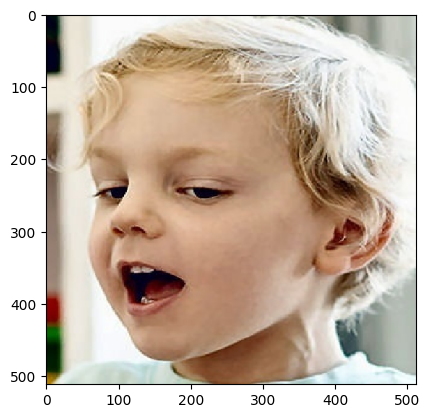

1/1 [==============================] - 2s 2s/step


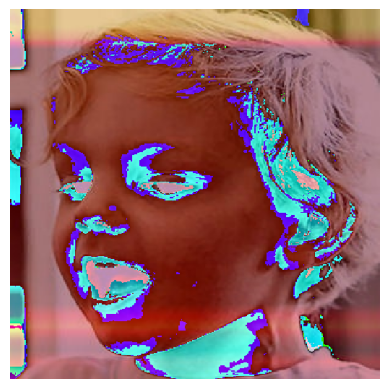

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

# Assuming preprocess_input is properly defined or imported for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming TP_list[0] is the path to your image
image = load_img(TP_list[10], target_size=(512, 512))  # Adjusting to VGG16's expected input
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension
plt.imshow(img_array[0].astype('uint8'))
plt.show()
img_array_1 = preprocess_input(img_array)

# Predict the class
preds = model.predict(img_array_1)
predicted_class = (preds > 0.5).astype("int32")

# Get the weights of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv3')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
class GradModel(tf.keras.models.Model):
    def __init__(self, model, last_conv_layer):
        super().__init__()
        self.model = model
        self.last_conv_layer = last_conv_layer
        self.gradient_model = tf.keras.models.Model(
            [model.inputs], [last_conv_layer.output, model.output])

    def call(self, inputs, training=None):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.gradient_model(inputs)
            tape.watch(conv_outputs)
            # Use predictions[:, 0] for binary classifiers with single sigmoid output
            top_pred_index = tf.argmax(predictions, axis=1)[0]
            top_class_channel = predictions[:, top_pred_index]

        # Compute gradients with respect to the conv_outputs
        grads = tape.gradient(top_class_channel, conv_outputs)

        return conv_outputs, grads

# Create a GradModel instance
grad_model = GradModel(model, last_conv_layer)

# Get the activations of the last conv layer and the gradients
conv_outputs, grads = grad_model(img_array_1)

# Average the gradients over the width and height
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
conv_outputs = conv_outputs[0].numpy()  # Convert to numpy array for item assignment
for i in range(conv_outputs.shape[-1]):
    conv_outputs[:, :, i] *= pooled_grads[i].numpy()

# The channel-wise mean of the resulting feature map is our heatmap of class activation
heatmap = np.mean(conv_outputs, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize the heatmap to the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[0], img_array.shape[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Display the superimposed image
plt.imshow(superimposed_img.astype('uint8'))
plt.axis('off')
plt.show()

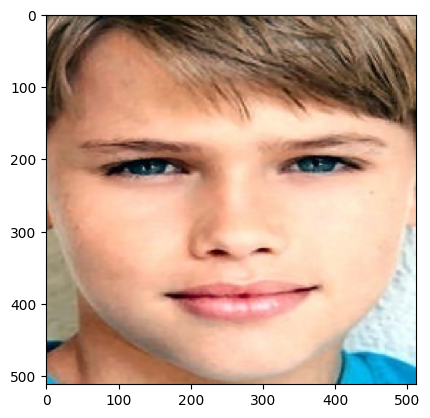

1/1 [==============================] - 3s 3s/step


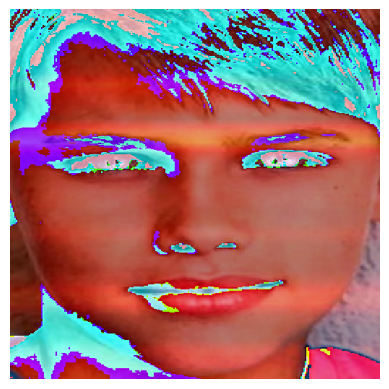

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt

# Assuming preprocess_input is properly defined or imported for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Assuming TN_list[0] is the path to your image
image = load_img(TN_list[50], target_size=(512, 512))  # Adjusting to VGG16's expected input
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Batch dimension
plt.imshow(img_array[0].astype('uint8'))
plt.show()
img_array_1 = preprocess_input(img_array)

# Predict the class
preds = model.predict(img_array_1)
predicted_class = (preds > 0.5).astype("int32")

# Get the weights of the last convolutional layer
last_conv_layer = model.get_layer('block5_conv3')

# Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
class GradModel(tf.keras.models.Model):
    def __init__(self, model, last_conv_layer):
        super().__init__()
        self.model = model
        self.last_conv_layer = last_conv_layer
        self.gradient_model = tf.keras.models.Model(
            [model.inputs], [last_conv_layer.output, model.output])

    def call(self, inputs, training=None):
        with tf.GradientTape() as tape:
            conv_outputs, predictions = self.gradient_model(inputs)
            tape.watch(conv_outputs)
            # Use predictions[:, 0] for binary classifiers with single sigmoid output
            top_pred_index = tf.argmax(predictions, axis=1)[0]
            top_class_channel = predictions[:, top_pred_index]

        # Compute gradients with respect to the conv_outputs
        grads = tape.gradient(top_class_channel, conv_outputs)

        return conv_outputs, grads

# Create a GradModel instance
grad_model = GradModel(model, last_conv_layer)

# Get the activations of the last conv layer and the gradients
conv_outputs, grads = grad_model(img_array_1)

# Average the gradients over the width and height
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
conv_outputs = conv_outputs[0].numpy()  # Convert to numpy array for item assignment
for i in range(conv_outputs.shape[-1]):
    conv_outputs[:, :, i] *= pooled_grads[i].numpy()

# The channel-wise mean of the resulting feature map is our heatmap of class activation
heatmap = np.mean(conv_outputs, axis=-1)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize the heatmap to the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[0], img_array.shape[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Display the superimposed image
plt.imshow(superimposed_img.astype('uint8'))
plt.axis('off')
plt.show()